In [1]:
from time import time
import lightgbm as lgb
import numpy as np
import sys
# sys.path.append('..\Python Scripts\pipeline')
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import KFold, TimeSeriesSplit
from scipy.stats import uniform
import datetime
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from sklearn.feature_selection import RFECV

from scipy import stats
# from hyperopt import hp, tpe
# from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.metrics import roc_auc_score
import seaborn as sns
%matplotlib inline
import gc
def reduce_memory_usage(df):
    '''
    iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    '''
    start_mem = df.memory_usage().sum()/1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if (col_type != object) & (col_type != 'datetime64[ns]'):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum()/1024**2
    print('Memory usage: Before|{:.2f} MB || After|{:.2f} MB || Decreased|{:.1f}%'.format(start_mem, end_mem, 100*(1 - end_mem/start_mem)))
    
    return df 
def missing_values_table(df):
    '''
    Функция возвращает таблицу с количеством и долей пропущенных значений в датафрейме
    '''
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns

In [2]:
main_path = r'../..'

import sys
sys.path.append(main_path)
from BayDS import *

Using TensorFlow backend.


In [52]:
train_ = pd.read_csv('X_score_agg.csv').set_index('TransactionID')
test_ = pd.read_csv('test_aggs.csv').set_index('TransactionID')

In [53]:
with pd.HDFStore('F:\my\Prog\kaggle\Fraud\hdf\pre-aggregate-no-duplicates.h5') as store:
    data = store[f'data']

In [54]:
train = data[data['isFraud'] != -1]
test = data[data['isFraud'] == -1]

del data
gc.collect()

444

In [55]:
train_.drop('score', axis=1, inplace=True)

In [56]:
feats = pd.read_csv('list_time_aggs_v1.csv')
features = feats.iloc[:, 1].tolist()[1:]

In [57]:
X = pd.concat([train, train_[features]], axis=1).drop('isFraud', axis=1)
del train, train_
gc.collect()

test = pd.concat([test, test_[features]], axis=1).drop('isFraud', axis=1)

In [58]:
del test_
gc.collect()

28

In [59]:
test.drop(3577539, inplace=True)

In [60]:
y = pd.read_pickle(f'f:/my/Prog/kaggle/Baydin/Data/y.pkl')

In [61]:
X.drop('Date', axis=1, inplace=True)
test.drop('Date', axis=1, inplace=True)

Fold 1 started at Wed Sep 11 23:02:53 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's auc: 0.990626	training's auc: 0.990626	valid_1's auc: 0.886545	valid_1's auc: 0.886545
[1000]	training's auc: 0.999545	training's auc: 0.999545	valid_1's auc: 0.894716	valid_1's auc: 0.894716
[1500]	training's auc: 0.999962	training's auc: 0.999962	valid_1's auc: 0.897291	valid_1's auc: 0.897291
[2000]	training's auc: 0.999998	training's auc: 0.999998	valid_1's auc: 0.898614	valid_1's auc: 0.898614
[2500]	training's auc: 1	training's auc: 1	valid_1's auc: 0.899675	valid_1's auc: 0.899675
[3000]	training's auc: 1	training's auc: 1	valid_1's auc: 0.900367	valid_1's auc: 0.900367
Early stopping, best iteration is:
[3119]	training's auc: 1	training's auc: 1	valid_1's auc: 0.900362	valid_1's auc: 0.900362
Fold 2 started at Thu Sep 12 01:24:17 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's auc: 0.990709	training's auc: 0.990709	valid

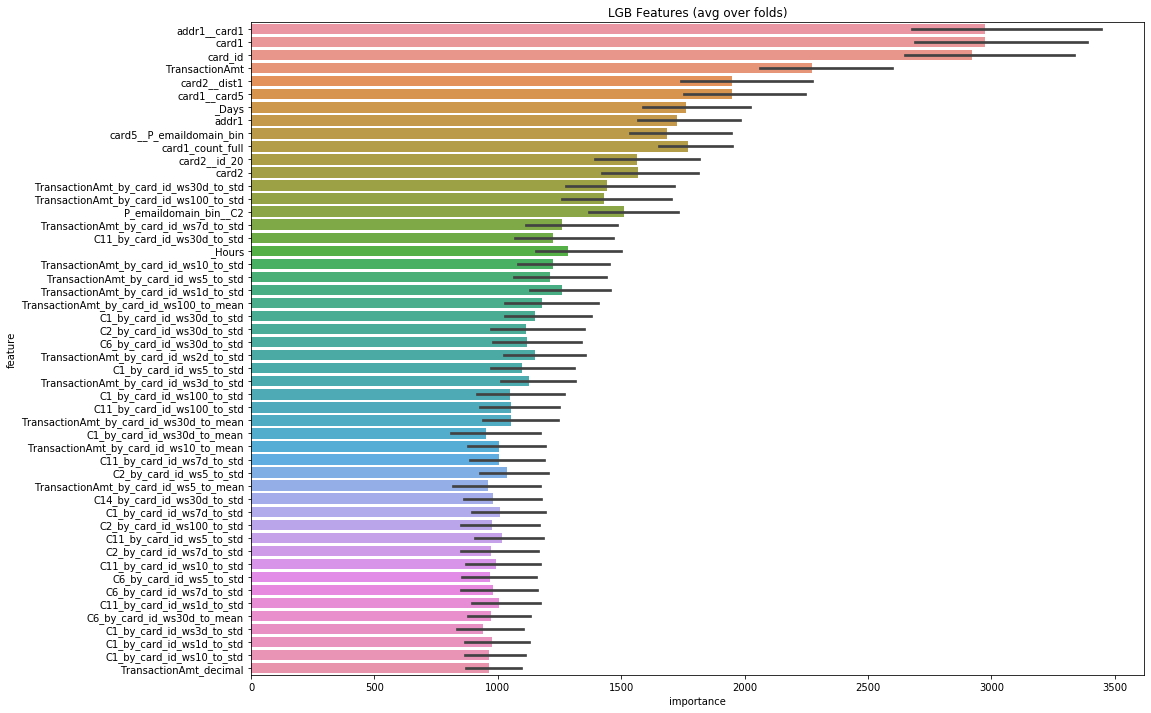

In [31]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47, 
         }

n_fold = 5
folds = KFold(n_splits=n_fold)
train_options = {
    "model_type":'lgb',
    "params": params,
    "eval_metric":'auc',
    'early_stopping_rounds': 200,
    'n_estimators': 10000,
    'averaging': 'usual',
    'use_groups': False,
    'fold_name': folds.__class__.__name__,
    'n_splits': n_fold
    
}

result_dict_lgb = train_model_classification(X=X, X_test=test, y=y, params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             eval_metric=train_options['eval_metric'],
                                             plot_feature_importance=True,
                                             verbose=500, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             n_jobs=-1, groups=None)

In [32]:
X = X.drop(features, axis=1)
test = test.drop(features, axis=1)

In [33]:
result_dict_lgb_ = train_model_classification(X=X, X_test=test, y=y, params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             eval_metric=train_options['eval_metric'],
                                             plot_feature_importance=True,
                                             verbose=500, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             n_jobs=-1, groups=None)

Fold 1 started at Thu Sep 12 08:02:23 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's auc: 0.980766	training's auc: 0.980766	valid_1's auc: 0.902296	valid_1's auc: 0.902296


KeyboardInterrupt: 

In [38]:
pd.DataFrame(result_dict_lgb['prediction'], index=test.index, columns=['isFraud']).to_csv('ieee-with-time-aggs-v2.csv')

In [35]:
result_dict_lgb['prediction']

array([[0.00034721],
       [0.000725  ],
       [0.00274554],
       ...,
       [0.00214056],
       [0.00151192],
       [0.00105652]])

In [62]:
corrs = X.corr()

In [63]:
X.iloc[:, 450:460]

,C10_by_card_id_ws2d_to_mean,C10_by_card_id_ws2d_to_std,C10_by_card_id_ws3d_to_std,C10_by_card_id_ws7d_to_mean,C10_by_card_id_ws7d_to_std,C10_by_card_id_ws30d_to_mean,C10_by_card_id_ws30d_to_std,C10_by_card_id_ws5_to_std,C10_by_card_id_ws10_to_mean,C10_by_card_id_ws10_to_std
TransactionID,,,,,,,,,,
2987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,1.0000,NaN,NaN,1.000,NaN,1.000,NaN,NaN,1.0000,NaN
2987005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987008,1.0000,NaN,NaN,1.000,NaN,1.000,NaN,NaN,1.0000,NaN


In [64]:
corrs[corrs>0.9].loc[]

SyntaxError: invalid syntax (<ipython-input-64-6b691fd940bd>, line 1)

In [4]:
X = train.sort_index().drop(['isFraud'], axis=1)
y = train.sort_index()['isFraud'].astype(np.uint8)
test = test.sort_index()

X.drop('Date', axis=1, inplace=True)
X=X.astype(np.float32)
test.drop('Date', axis=1, inplace=True)
test=test.astype(np.float32)

del train
gc.collect()

49

In [5]:
X_time = pd.read_csv('X_score_agg.csv').set_index('TransactionID')

feats = pd.read_csv('list_time_aggs_v1.csv')
features = feats.iloc[:, 1].tolist()[1:]
X_time = X_time[features]

X = X_time.join(X)

del X_time
gc.collect()

49

In [15]:
X.shape

(590540, 628)

In [16]:
test.shape

(506691, 628)

In [6]:
test_time = pd.read_csv('test_aggs.csv').set_index('TransactionID')[features]

In [7]:
test_time.drop(3577539, inplace=True)

In [27]:
test_time.shape

(506691, 300)

In [8]:
test = test.join(test_time).drop('isFraud', axis=1)

Fold 1 started at Wed Sep 11 16:36:38 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[28]	training's auc: 0.958248	training's auc: 0.958262	valid_1's auc: 0.902131	valid_1's auc: 0.902115
Fold 2 started at Wed Sep 11 16:39:45 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[28]	training's auc: 0.957192	training's auc: 0.957201	valid_1's auc: 0.926459	valid_1's auc: 0.926476
Fold 3 started at Wed Sep 11 16:42:56 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[28]	training's auc: 0.956093	training's auc: 0.956096	valid_1's auc: 0.93007	valid_1's auc: 0.930097
Fold 4 started at Wed Sep 11 16:46:09 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's auc: 0.989872	training's auc: 0.989872	valid_1's auc: 0.944281	valid_1's auc: 0.944281
[1000]	training's auc: 0.998476	training's auc: 0.998476	va

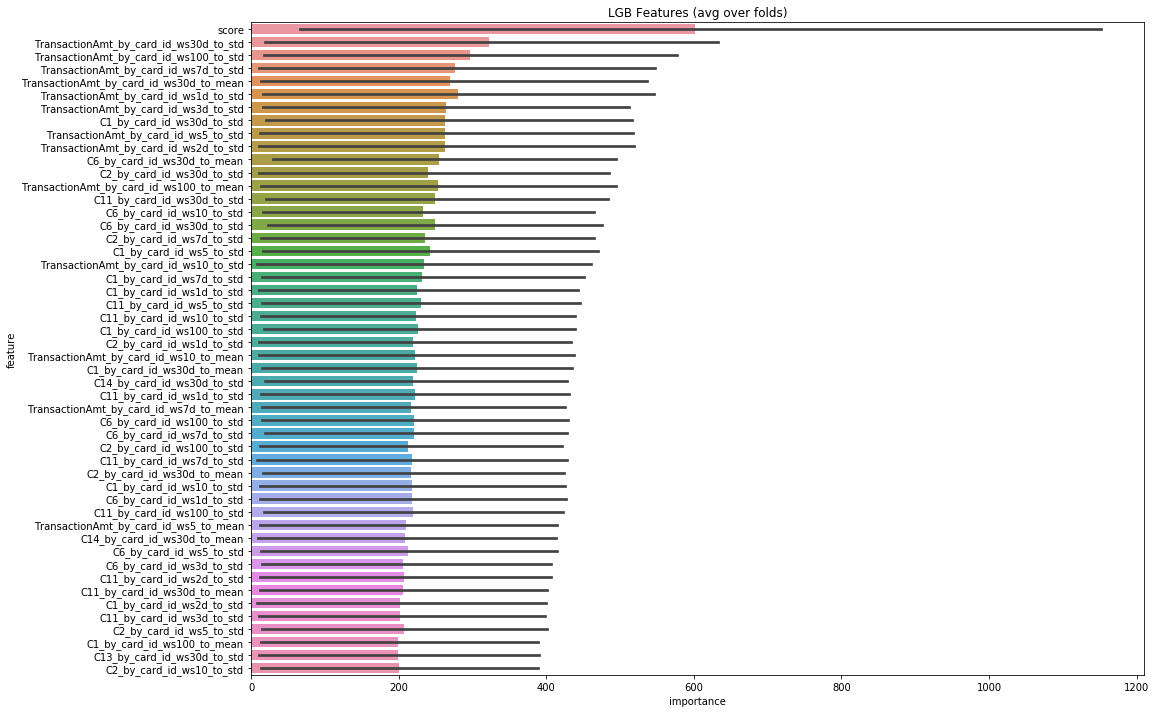

In [77]:
result_dict_lgb = train_model_classification(X=X, X_test=test, y=y, params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             eval_metric=train_options['eval_metric'],
                                             plot_feature_importance=True,
                                             verbose=500, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             n_jobs=-1, groups=None)

In [85]:
pd.DataFrame(result_dict_lgb['prediction'], index=testscore.index, columns=['isFraud']).to_csv('ieee-with-time-aggs-v1.csv')